In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from caviar import CaviarModel
from var_tests import binomial_test, kupiec_pof_test, christoffersen_test, traffic_light_test
from backtesting import backtest

In [3]:
while True:
    data = yf.download('SPY AAPL MSFT JPM KO XOM', start='2001-01-01')
    if data.shape[0] > 0:
        break

[*********************100%***********************]  6 of 6 completed


In [4]:
log_returns = (data['Close'].apply(np.log).diff() * 100).dropna()

In [5]:
low_open_log_difference = (
    (data['Low'].apply(np.log) - data['Open'].apply(np.log))
).dropna()

In [6]:
out_low_open_diff = low_open_log_difference['2016':]

In [7]:
in_samples = log_returns[:'2015']
out_samples = log_returns['2016':]

In [13]:
q = 0.95
mod = 'adaptive'
method_fit = 'mle'

D:\CAViaR-Project\test\..\caviar\_caviar_function.py:22: RuntimeWarning: overflow encountered in exp
  1 / (1 + np.exp(G * (returns[t] - VaRs[t]))) - quantile


Final loss: 0.27665941000140076
Time taken(s): 1.70
2.3465632861211017
0.05306609641702693


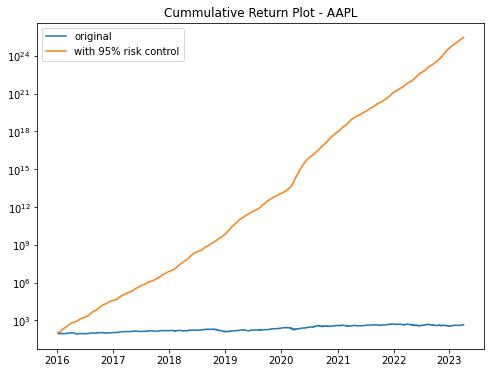

D:\CAViaR-Project\test\..\caviar\_caviar_function.py:22: RuntimeWarning: overflow encountered in exp
  1 / (1 + np.exp(G * (returns[t] - VaRs[t]))) - quantile


Final loss: 0.2637534372208367
Time taken(s): 1.49
1.9448249344184294
0.020201606297943507


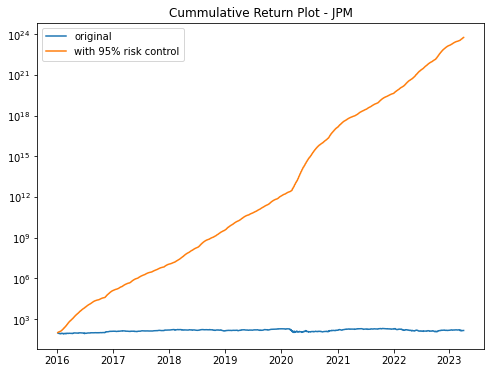

D:\CAViaR-Project\test\..\caviar\_caviar_function.py:22: RuntimeWarning: overflow encountered in exp
  1 / (1 + np.exp(G * (returns[t] - VaRs[t]))) - quantile


Final loss: 0.13010490351235057
Time taken(s): 2.83
2.1946815123949106
0.016778905564945455


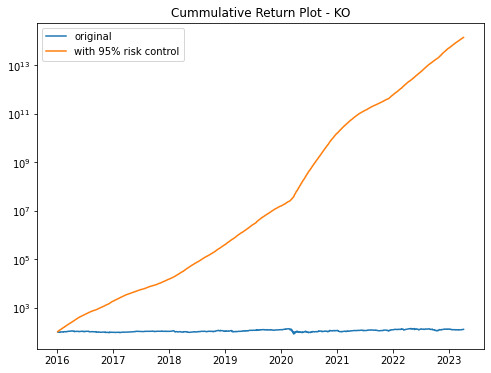

D:\CAViaR-Project\test\..\caviar\_caviar_function.py:22: RuntimeWarning: overflow encountered in exp
  1 / (1 + np.exp(G * (returns[t] - VaRs[t]))) - quantile


Final loss: 0.20250472270213998
Time taken(s): 1.94
2.568821806632095
0.05064850209874426


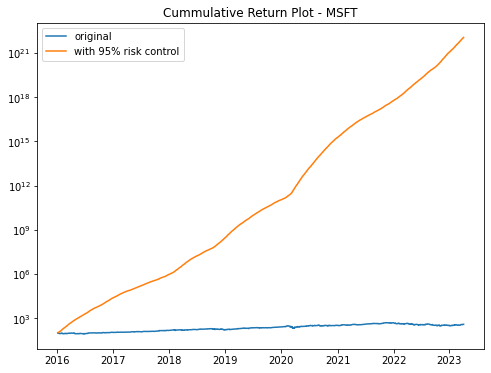

D:\CAViaR-Project\test\..\caviar\_caviar_function.py:22: RuntimeWarning: overflow encountered in exp
  1 / (1 + np.exp(G * (returns[t] - VaRs[t]))) - quantile


Final loss: 0.12379124471369178
Time taken(s): 1.28
2.0097246287851096
0.03192502571431197


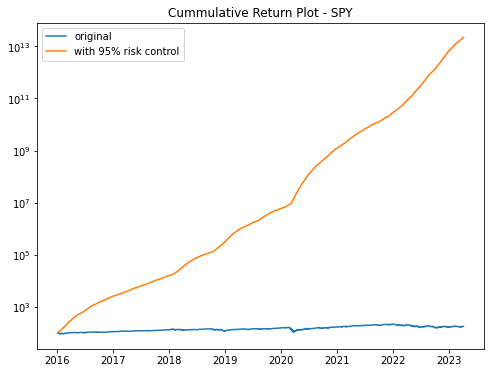

D:\CAViaR-Project\test\..\caviar\_caviar_function.py:22: RuntimeWarning: overflow encountered in exp
  1 / (1 + np.exp(G * (returns[t] - VaRs[t]))) - quantile


Final loss: 0.15880648100987477
Time taken(s): 2.21
1.9819154870107187
0.01157084478183105


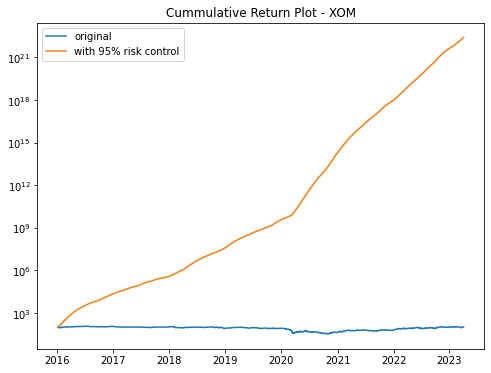

In [14]:
stat_df = []

for ticker in log_returns.columns:
    caviar_model = CaviarModel(quantile=q, model=mod, method=method_fit)
    caviar_model.fit(in_samples[ticker])
    # we only want day 0 to T as the return are from day 0 to T
    # so drop the last forecast
    out_VaRs = caviar_model.predict(out_samples[ticker], caviar_model.VaR0_out)[:-1]
    stat1, stat2, stat3, stat4, stat5, stat6 = backtest(
        out_samples[ticker], out_low_open_diff[ticker], out_VaRs, q, ticker=ticker
    )
    stat_df.append({
        'ticker': ticker,
        'annualized_return_with_CAViaR': stat1,
        'cumulative_return_with_CAViaR': stat2,
        'maximum_drawdown_with_CAViaR': stat3,
        'annualized_return_w/o_CAViaR': stat4,
        'cumulative_return_w/o_CAViaR': stat5,
        'maximum_drawdown_w/o_CAViaR': stat6,
    })

In [10]:
pd.DataFrame(stat_df)

,ticker,annualized_return_with_CAViaR,cumulative_return_with_CAViaR,maximum_drawdown_with_CAViaR,annualized_return_w/o_CAViaR,cumulative_return_w/o_CAViaR,maximum_drawdown_w/o_CAViaR
0,AAPL,0.419243,11.624242,-0.294786,0.231950,3.529822,-0.403706
1,JPM,0.095232,0.932434,-0.365480,0.052196,0.445528,-0.476386
2,KO,0.063639,0.563314,-0.177436,0.033190,0.266762,-0.391186
3,MSFT,0.326210,6.726220,-0.278824,0.205566,2.872483,-0.410032
4,SPY,0.096615,0.950177,-0.225969,0.081563,0.764430,-0.361400
5,XOM,0.150864,1.766561,-0.504480,0.010042,0.075045,-0.721130
